# Phase 4



## Unsupervised ML (Clustering)



Note: This phase requires your general knowledge and thought process to merge the right datasets and the right columns. Collecting quality data is a key factor to create meaningful clusters and Analysis.



Assumption: You were given various crime datasets that contains all the DISTRICTS in each state and you were asked to provide the below data to the higher authorities for further action.



4.1  "Create 3 clusters as below.



1. Sensitive Area's



2. Moderate Area's



3. Peaceful Area's"



4.2  Create DataFrame for each cluster that shows data according to the areas.



4.3  "Analyse your clusters and prepare a report that explains all your observations.



Example - 



1. What is impacting more crimes in sensitive areas. 



2. What needs to be done to reduce crime. 



3. Most safe and unsafe districts.



4. Etc.......Anything that you observe (If you want, you can plot various graphs to analyze)"



4.4   Capstone project overall story in your own words. Min 1000 words.

# Unsupervised ML (Clustering)

In [1]:
import pandas as pd

In [2]:
district_wise=pd.read_csv("01_District_wise_crimes_committed_IPC_2001_2012.csv")

In [3]:
district_wise

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9013,LAKSHADWEEP,TOTAL,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9014,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,0,6,2,...,1,186,0,2,0,1,0,44,392,787
9015,PUDUCHERRY,PUDUCHERRY,2012,24,21,10,7,0,7,17,...,20,632,0,7,2,5,0,219,1668,3494


In [4]:
district_wise['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI UT', 'LAKSHADWEEP', 'PUDUCHERRY'],
      dtype=object)

In [5]:
districtwise_sc=pd.read_csv("02_01_District_wise_crimes_committed_against_SC_2001_2012.csv")

In [6]:
districtwise_sc['TOTAL CRIMES AGAINST SC']=districtwise_sc.iloc[:,3:].sum(axis=1)

In [7]:
districtwise_sc_tot=districtwise_sc[['STATE/UT','DISTRICT','Year','TOTAL CRIMES AGAINST SC']]

In [8]:
districtwise_sc_tot

,STATE/UT,DISTRICT,Year,TOTAL CRIMES AGAINST SC
0,ANDHRA PRADESH,ADILABAD,2001,55
1,ANDHRA PRADESH,ANANTAPUR,2001,127
2,ANDHRA PRADESH,CHITTOOR,2001,114
3,ANDHRA PRADESH,CUDDAPAH,2001,100
4,ANDHRA PRADESH,EAST GODAVARI,2001,89
...,...,...,...,...
9013,LAKSHADWEEP,LAKSHADWEEP,2012,0
9014,LAKSHADWEEP,TOTAL,2012,0
9015,PUDUCHERRY,KARAIKAL,2012,1
9016,PUDUCHERRY,PUDUCHERRY,2012,23


In [9]:
districtwise_st=pd.read_csv("02_District_wise_crimes_committed_against_ST_2001_2012.csv")

In [10]:
districtwise_st['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP', 'PUDUCHERRY'], dtype=object)

In [11]:
districtwise_st['TOTAL CRIMES AGAINST ST']=districtwise_st.iloc[:,3:].sum(axis=1)

In [12]:
districtwise_st_tot=districtwise_st[['STATE/UT','DISTRICT','Year','TOTAL CRIMES AGAINST ST']]

In [13]:
districtwise_st_tot

,STATE/UT,DISTRICT,Year,TOTAL CRIMES AGAINST ST
0,ANDHRA PRADESH,ADILABAD,2001,18
1,ANDHRA PRADESH,ANANTAPUR,2001,14
2,ANDHRA PRADESH,CHITTOOR,2001,2
3,ANDHRA PRADESH,CUDDAPAH,2001,4
4,ANDHRA PRADESH,EAST GODAVARI,2001,14
...,...,...,...,...
9013,LAKSHADWEEP,LAKSHADWEEP,2012,0
9014,LAKSHADWEEP,TOTAL,2012,0
9015,PUDUCHERRY,KARAIKAL,2012,0
9016,PUDUCHERRY,PUDUCHERRY,2012,0


In [14]:
districtwise_child=pd.read_csv("03_District_wise_crimes_committed_against_children_2001_2012.csv")

In [15]:
districtwise_child['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP', 'PUDUCHERRY'], dtype=object)

In [16]:
districtwise_child.rename(columns={"Total":"TOTAL CRIMES AGAINST CHILDREN"},inplace=True)

In [17]:
districtwise_child.columns

Index(['STATE/UT', 'DISTRICT', 'Year', 'Murder', 'Rape',
       'Kidnapping and Abduction', 'Foeticide', 'Abetment of suicide',
       'Exposure and abandonment', 'Procuration of minor girls',
       'Buying of girls for prostitution', 'Selling of girls for prostitution',
       'Prohibition of child marriage act', 'Other Crimes',
       'TOTAL CRIMES AGAINST CHILDREN'],
      dtype='object')

In [18]:
districtwise_child_tot=districtwise_child[['STATE/UT','DISTRICT','Year','TOTAL CRIMES AGAINST CHILDREN']]

In [19]:
districtwise_child_tot

,STATE/UT,DISTRICT,Year,TOTAL CRIMES AGAINST CHILDREN
0,ANDHRA PRADESH,ADILABAD,2001,0
1,ANDHRA PRADESH,ANANTAPUR,2001,66
2,ANDHRA PRADESH,CHITTOOR,2001,0
3,ANDHRA PRADESH,CUDDAPAH,2001,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,0
...,...,...,...,...
9010,LAKSHADWEEP,LAKSHADWEEP,2012,0
9011,LAKSHADWEEP,TOTAL,2012,0
9012,PUDUCHERRY,KARAIKAL,2012,7
9013,PUDUCHERRY,PUDUCHERRY,2012,25


In [20]:
districtwise_women=pd.read_csv("42_District_wise_crimes_committed_against_women_2001_2012.csv")

In [21]:
districtwise_women['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP', 'PUDUCHERRY'], dtype=object)

In [22]:
districtwise_women['TOTAL CRIMES AGAINST WOMEN']=districtwise_women.iloc[:,3:].sum(axis=1)

In [23]:
districtwise_women_tot=districtwise_women[['STATE/UT','DISTRICT','Year','TOTAL CRIMES AGAINST WOMEN']]

In [24]:
districtwise_women_tot

,STATE/UT,DISTRICT,Year,TOTAL CRIMES AGAINST WOMEN
0,ANDHRA PRADESH,ADILABAD,2001,454
1,ANDHRA PRADESH,ANANTAPUR,2001,356
2,ANDHRA PRADESH,CHITTOOR,2001,456
3,ANDHRA PRADESH,CUDDAPAH,2001,278
4,ANDHRA PRADESH,EAST GODAVARI,2001,475
...,...,...,...,...
9012,LAKSHADWEEP,LAKSHADWEEP,2012,2
9013,LAKSHADWEEP,TOTAL,2012,2
9014,PUDUCHERRY,KARAIKAL,2012,11
9015,PUDUCHERRY,PUDUCHERRY,2012,35


In [25]:
cluster=pd.merge(district_wise,districtwise_sc_tot,how='inner',left_on=['STATE/UT','DISTRICT','YEAR'],right_on=['STATE/UT','DISTRICT','Year']).merge(districtwise_st_tot,how='inner',left_on=['STATE/UT','DISTRICT','Year'],right_on=['STATE/UT','DISTRICT','Year']).merge(districtwise_child_tot,how='inner',left_on=['STATE/UT','DISTRICT','Year'],right_on=['STATE/UT','DISTRICT','Year']).merge(districtwise_women_tot,how='inner',left_on=['STATE/UT','DISTRICT','Year'],right_on=['STATE/UT','DISTRICT','Year'])

In [26]:
cluster

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Year,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST ST,TOTAL CRIMES AGAINST CHILDREN,TOTAL CRIMES AGAINST WOMEN
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,175,0,181,1518,4154,2001,55,18,0,454
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,154,0,270,754,4125,2001,127,14,66,356
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,186,0,404,1262,5818,2001,114,2,0,456
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,57,0,233,1181,3140,2001,100,4,0,278
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,247,0,431,2313,6507,2001,89,14,0,475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8817,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,...,1,0,0,32,60,2012,0,0,0,2
8818,LAKSHADWEEP,TOTAL,2012,0,0,0,0,0,0,0,...,1,0,0,32,60,2012,0,0,0,2
8819,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,0,6,2,...,1,0,44,392,787,2012,1,0,7,11
8820,PUDUCHERRY,PUDUCHERRY,2012,24,21,10,7,0,7,17,...,5,0,219,1668,3494,2012,23,0,25,35


# 4.1  CLUSTERING USING THE KMEANS

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [28]:
kmeans=KMeans(n_clusters=3,random_state=0)
x=cluster.iloc[:,2:]
y_kmeans=kmeans.fit_predict(x)

C:\Users\ASHLIE\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


# 4.2  Create DataFrame for each cluster that shows data according to the areas.

In [29]:
sensitive_regions=cluster[y_kmeans==2]


In [30]:
sensitive_regions

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Year,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST ST,TOTAL CRIMES AGAINST CHILDREN,TOTAL CRIMES AGAINST WOMEN
69,ASSAM,TOTAL,2001,1356,481,40,817,0,817,1480,...,1248,0,2010,9315,36877,2001,6,0,18,4048
114,BIHAR,TOTAL,2001,3643,3419,250,888,0,888,2159,...,1558,83,2406,36667,88432,2001,1303,47,83,4489
185,HARYANA,TOTAL,2001,781,467,78,398,0,398,449,...,1513,0,856,15906,38759,2001,229,0,363,3372
250,JHARKHAND,TOTAL,2001,1507,866,143,567,0,567,441,...,484,2,420,8777,25447,2001,158,282,41,1851
252,KARNATAKA,BANGALORE COMMR.,2001,221,327,5,40,0,40,152,...,229,0,38,11106,27254,2001,94,7,6,639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8325,KARNATAKA,BANGALORE COMMR.,2012,266,454,6,90,0,90,532,...,524,0,170,7665,29297,2012,158,0,551,1470
8453,MAHARASHTRA,MUMBAI COMMR.,2012,215,170,9,232,0,232,212,...,388,0,621,6423,30508,2012,28,1,517,1621
8557,ODISHA,TOTAL,2012,1548,1879,54,1458,0,1458,1542,...,2638,0,3605,22203,67957,2012,2265,688,418,10476
8586,PUNJAB,TOTAL,2012,855,1045,104,680,1,679,919,...,1293,0,3405,10405,35790,2012,71,0,877,3151


In [31]:
moderate_regions=cluster[y_kmeans==1]

In [32]:
moderate_regions

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Year,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST ST,TOTAL CRIMES AGAINST CHILDREN,TOTAL CRIMES AGAINST WOMEN
28,ANDHRA PRADESH,TOTAL,2001,2602,1555,136,871,0,871,1182,...,5791,7,7400,34344,130089,2001,2933,512,270,13669
166,GUJARAT,TOTAL,2001,1226,537,94,286,0,286,998,...,3667,0,2924,50719,103419,2001,1242,309,572,5744
282,KARNATAKA,TOTAL,2001,1626,1475,74,293,0,293,559,...,1755,0,100,47301,109098,2001,1621,276,68,4285
299,KERALA,TOTAL,2001,472,615,111,562,0,562,183,...,2561,0,0,54544,103847,2001,499,83,247,5270
348,MADHYA PRADESH,TOTAL,2001,2425,2870,125,2851,0,2851,956,...,2562,0,3297,85143,181741,2001,4212,1535,1425,14504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8480,MAHARASHTRA,TOTAL,2012,2712,2168,171,1839,0,1839,1583,...,7415,0,13311,46668,202700,2012,1091,308,3456,15952
8629,RAJASTHAN,TOTAL,2012,1461,1538,98,2049,0,2049,3243,...,13312,0,8284,70240,170948,2012,5559,1351,1807,20906
8674,TAMIL NADU,TOTAL,2012,1949,2954,44,737,0,737,1945,...,1965,0,15499,124176,200474,2012,1647,27,1036,6381
8761,UTTAR PRADESH,TOTAL,2012,4966,4811,1410,1963,0,1963,8878,...,7661,0,14406,68538,198093,2012,6202,44,6033,23033


In [33]:
peaceful_regions=cluster[y_kmeans==0]

In [34]:
peaceful_regions

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Year,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST ST,TOTAL CRIMES AGAINST CHILDREN,TOTAL CRIMES AGAINST WOMEN
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,175,0,181,1518,4154,2001,55,18,0,454
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,154,0,270,754,4125,2001,127,14,66,356
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,186,0,404,1262,5818,2001,114,2,0,456
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,57,0,233,1181,3140,2001,100,4,0,278
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,247,0,431,2313,6507,2001,89,14,0,475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8817,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,...,1,0,0,32,60,2012,0,0,0,2
8818,LAKSHADWEEP,TOTAL,2012,0,0,0,0,0,0,0,...,1,0,0,32,60,2012,0,0,0,2
8819,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,0,6,2,...,1,0,44,392,787,2012,1,0,7,11
8820,PUDUCHERRY,PUDUCHERRY,2012,24,21,10,7,0,7,17,...,5,0,219,1668,3494,2012,23,0,25,35


# 4.3 "Analyse your clusters and prepare a report that explains all your observations

In [35]:
peaceful_regions['OVERALL CRIME']=peaceful_regions.iloc[:,2:].sum(axis=1)

C:\Users\ASHLIE\AppData\Local\Temp\ipykernel_372\1054184099.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  peaceful_regions['OVERALL CRIME']=peaceful_regions.iloc[:,2:].sum(axis=1)


In [36]:
peaceful_regions.sort_values(by='OVERALL CRIME',ascending=True,inplace=True)

C:\Users\ASHLIE\AppData\Local\Temp\ipykernel_372\3564870969.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  peaceful_regions.sort_values(by='OVERALL CRIME',ascending=True,inplace=True)


In [37]:
peaceful_regions.head(10).reset_index().drop(['index'],axis=1)

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Year,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST ST,TOTAL CRIMES AGAINST CHILDREN,TOTAL CRIMES AGAINST WOMEN,OVERALL CRIME
0,HIMACHAL PRADESH,G.R.P.,2003,0,0,0,0,0,0,0,...,0,0,1,1,2003,0,0,0,0,4008
1,HIMACHAL PRADESH,G.R.P.,2001,1,0,0,0,0,0,0,...,0,0,1,4,2001,0,0,0,0,4011
2,ASSAM,C.I.D.,2001,0,0,0,0,0,0,0,...,0,0,2,8,2001,0,0,0,0,4019
3,MANIPUR,CID,2008,0,0,0,0,0,0,0,...,0,0,0,2,2008,0,0,0,0,4020
4,MANIPUR,CID,2009,0,0,0,0,0,0,0,...,0,0,0,1,2009,0,0,0,0,4020
5,HIMACHAL PRADESH,G.R.P.,2002,0,0,0,0,0,0,1,...,0,0,2,8,2002,0,0,0,0,4022
6,HIMACHAL PRADESH,CID,2009,0,0,0,0,0,0,0,...,0,0,1,2,2009,0,0,0,0,4022
7,MANIPUR,CID,2010,0,0,0,0,0,0,0,...,0,0,0,2,2010,0,0,0,0,4024
8,ARUNACHAL PRADESH,UPPER DIBANG VALLEY,2007,1,0,0,0,0,0,0,...,0,0,3,5,2007,0,0,0,0,4024
9,HIMACHAL PRADESH,G.R.P.,2006,0,0,0,0,0,0,0,...,0,0,4,6,2006,0,0,0,0,4024


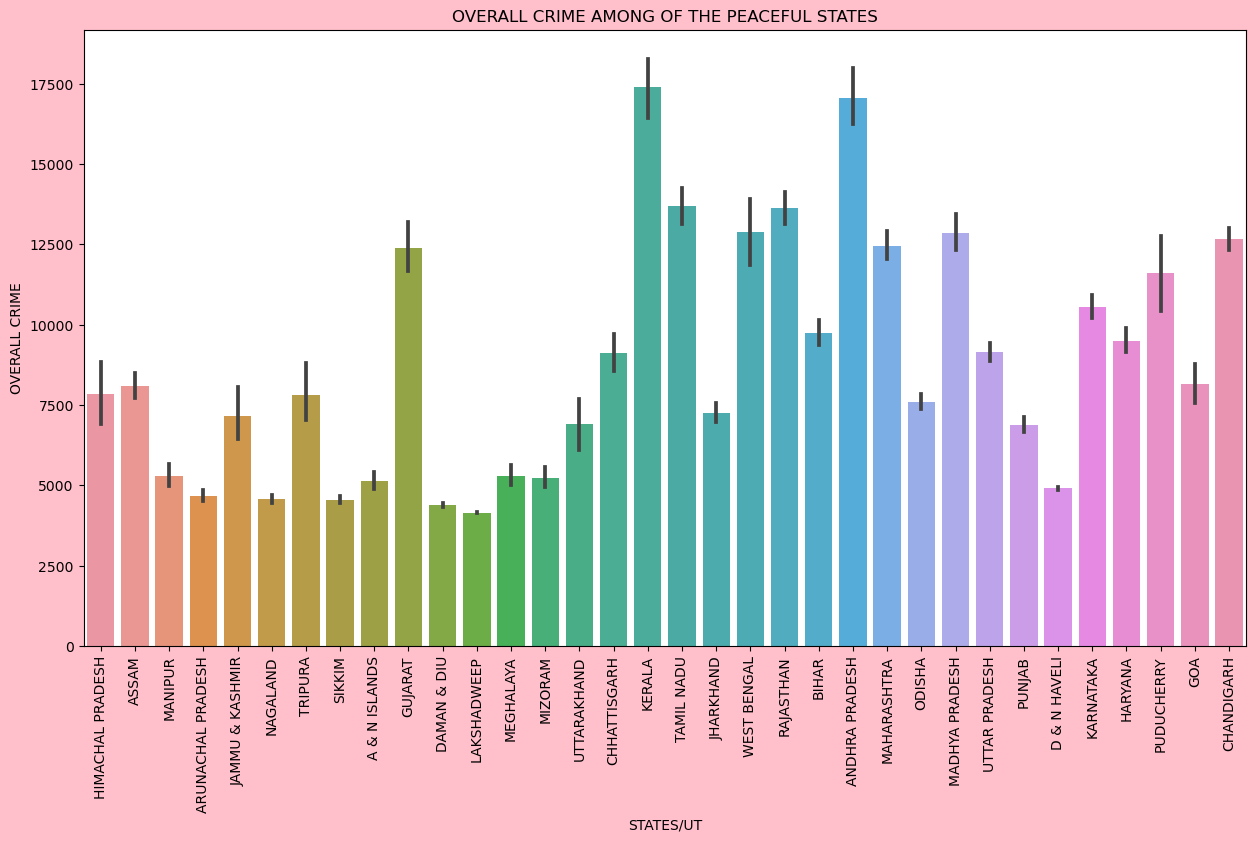

In [38]:
plt.figure(figsize=(15,8),facecolor='Pink')
sns.barplot(x=peaceful_regions['STATE/UT'],y=peaceful_regions['OVERALL CRIME'],)
plt.xticks(rotation=90)
plt.xlabel("STATES/UT")
plt.ylabel("OVERALL CRIME")
plt.title("OVERALL CRIME AMONG OF THE PEACEFUL STATES")
plt.show()

THIS ARE THE STATES WITH OVERALL CRIME IN PEACEFUL AREAS.


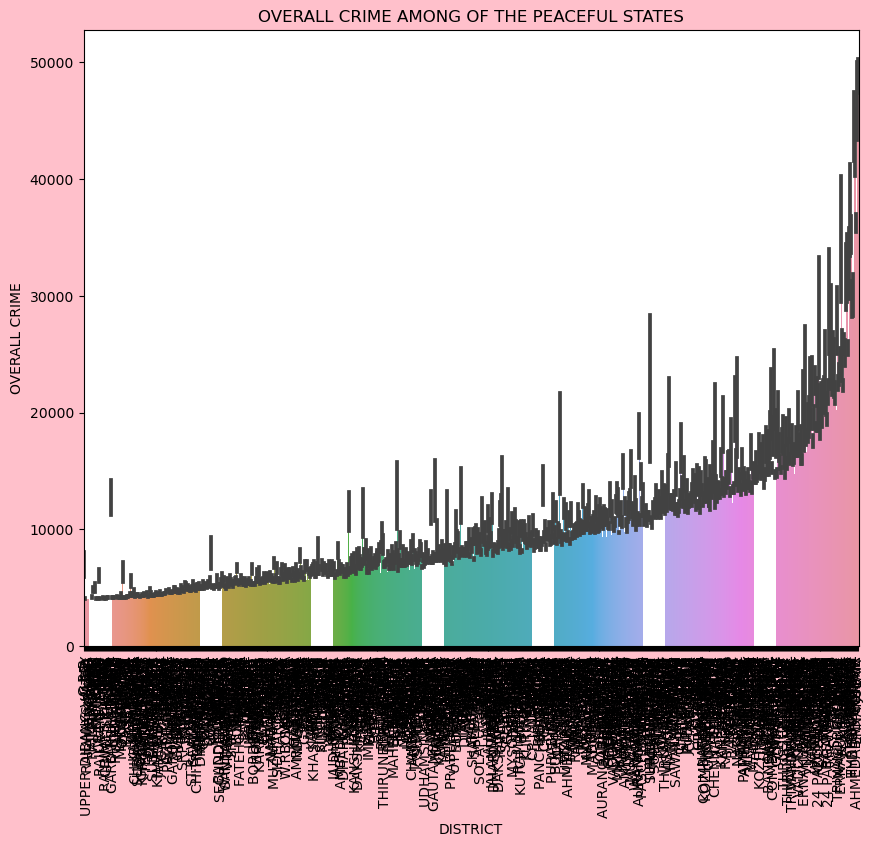

In [50]:
plt.figure(figsize=(10,8),facecolor='Pink')
sns.barplot(x=peaceful_regions['DISTRICT'],y=peaceful_regions['OVERALL CRIME'],)
plt.xticks(rotation=90)
plt.xlabel("DISTRICT")
plt.ylabel("OVERALL CRIME")
plt.title("OVERALL CRIME AMONG OF THE PEACEFUL STATES")
plt.show()

In [40]:
sensitive_regions['OVERALL CRIME']=sensitive_regions.iloc[:,2:].sum(axis=1)

C:\Users\ASHLIE\AppData\Local\Temp\ipykernel_372\2690452537.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sensitive_regions['OVERALL CRIME']=sensitive_regions.iloc[:,2:].sum(axis=1)


In [41]:
sensitive_regions.sort_values(by='OVERALL CRIME',ascending=False,inplace=True)

C:\Users\ASHLIE\AppData\Local\Temp\ipykernel_372\1187980878.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sensitive_regions.sort_values(by='OVERALL CRIME',ascending=False,inplace=True)


In [42]:
sensitive_regions.head(10).reset_index().drop(['index'],axis=1)

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Year,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST ST,TOTAL CRIMES AGAINST CHILDREN,TOTAL CRIMES AGAINST WOMEN,OVERALL CRIME
0,UTTAR PRADESH,TOTAL,2003,5284,3793,1525,911,0,911,2208,...,0,4428,29449,95073,2003,2821,47,1702,12426,230018
1,BIHAR,TOTAL,2005,3471,3307,259,1147,0,1147,2693,...,74,2680,40057,97850,2005,1824,82,115,5202,221585
2,BIHAR,TOTAL,2002,3712,3526,396,1040,0,1040,2361,...,38,2497,39145,94040,2002,1579,29,57,4953,212248
3,BIHAR,TOTAL,2003,3771,3540,298,985,0,985,2427,...,37,2574,37503,92263,2003,1747,52,56,5184,209107
4,WEST BENGAL,TOTAL,2007,1652,877,394,2106,0,2106,1800,...,5,3803,27903,81102,2007,4,5,361,16432,200673
5,BIHAR,TOTAL,2001,3643,3419,250,888,0,888,2159,...,83,2406,36667,88432,2001,1303,47,83,4489,199536
6,ASSAM,TOTAL,2012,1368,670,54,1716,0,1716,3812,...,2,2565,27077,77682,2012,4,0,392,13470,188176
7,WEST BENGAL,TOTAL,2004,1425,390,468,1475,0,1475,1200,...,12,2995,27426,69350,2004,14,9,206,10865,170942
8,WEST BENGAL,TOTAL,2006,1425,672,401,1731,0,1731,1355,...,1,3039,23274,68052,2006,13,7,432,12690,168876
9,ODISHA,TOTAL,2012,1548,1879,54,1458,0,1458,1542,...,0,3605,22203,67957,2012,2265,688,418,10476,166415


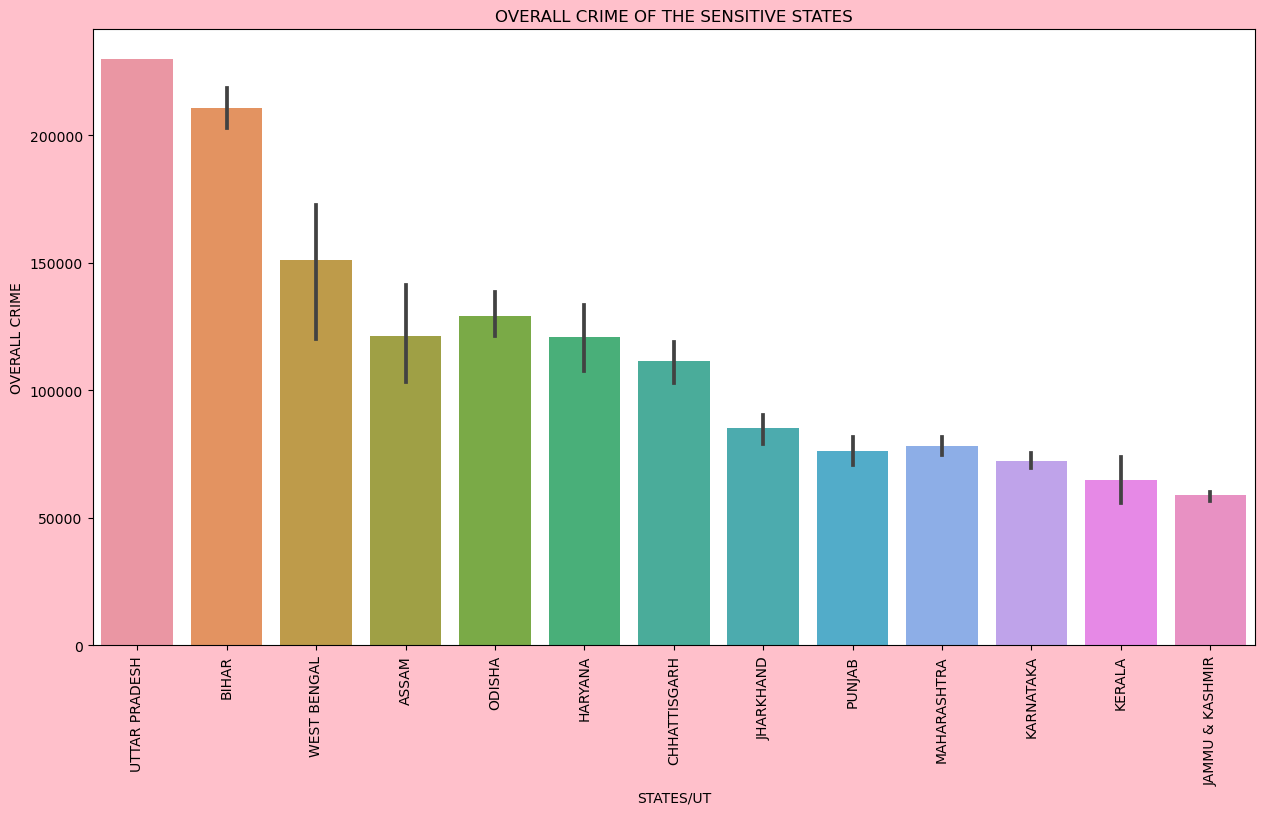

In [43]:
plt.figure(figsize=(15,8),facecolor='Pink')
sns.barplot(x=sensitive_regions['STATE/UT'],y=sensitive_regions['OVERALL CRIME'],)
plt.xticks(rotation=90)
plt.xlabel("STATES/UT")
plt.ylabel("OVERALL CRIME")
plt.title("OVERALL CRIME OF THE SENSITIVE STATES")
plt.show()

OVERALL CRIMES IN THE SENSITIVE REGION.
UTTAR PRADESH IS THE MOST SENSITIVE AREA FOLLOWED BY BIHAR AMONG ALL THE STATES OF INDIA.


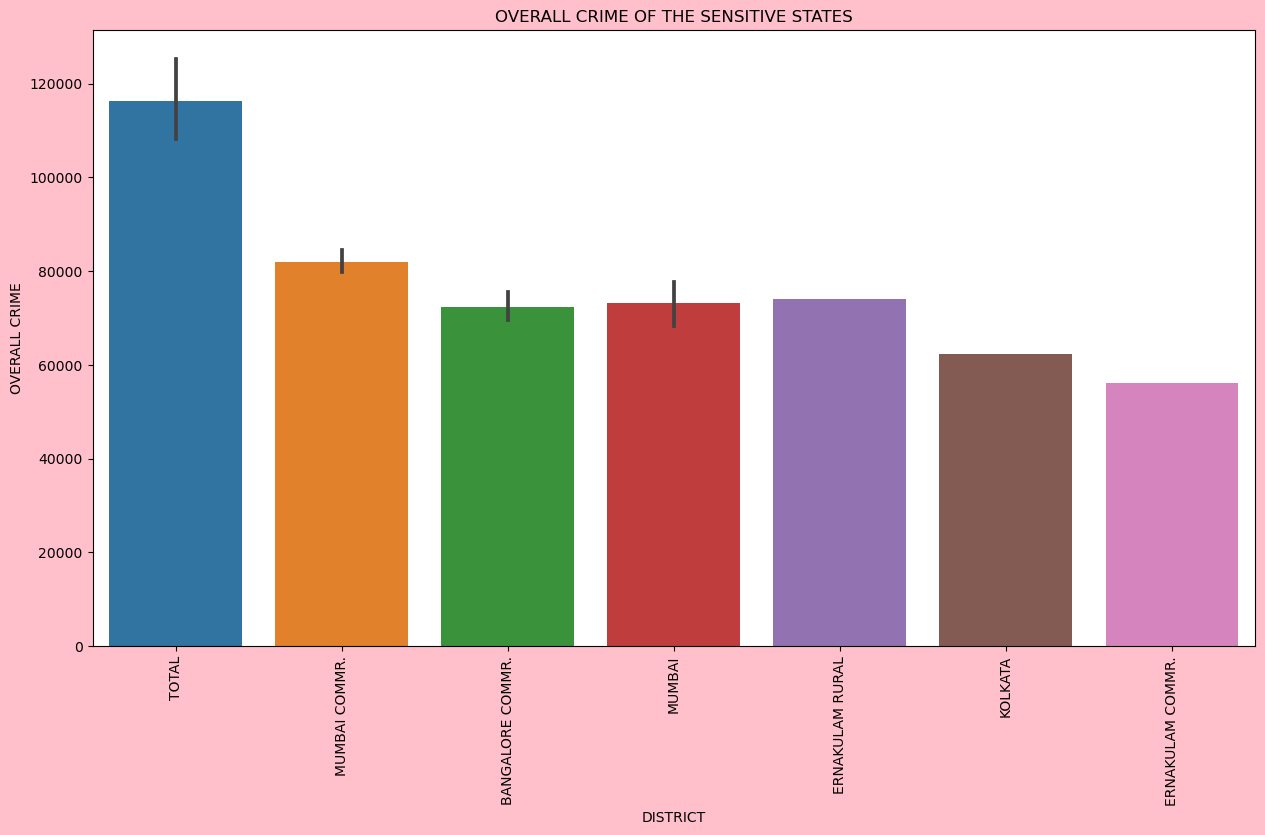

In [44]:
plt.figure(figsize=(15,8),facecolor='Pink')
sns.barplot(x=sensitive_regions['DISTRICT'],y=sensitive_regions['OVERALL CRIME'],)
plt.xticks(rotation=90)
plt.xlabel("DISTRICT")
plt.ylabel("OVERALL CRIME")
plt.title("OVERALL CRIME OF THE SENSITIVE STATES")
plt.show()

IN DISTRICT MUMBAI IS THE MOST SENSITIVE AREA.


In [46]:
moderate_regions['OVERALL CRIME']=moderate_regions.iloc[:,2:].sum(axis=1)

C:\Users\ASHLIE\AppData\Local\Temp\ipykernel_372\1441277846.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  moderate_regions['OVERALL CRIME']=moderate_regions.iloc[:,2:].sum(axis=1)


In [47]:
moderate_regions.sort_values(by='OVERALL CRIME',ascending=False,inplace=True)

C:\Users\ASHLIE\AppData\Local\Temp\ipykernel_372\775342335.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  moderate_regions.sort_values(by='OVERALL CRIME',ascending=False,inplace=True)


In [48]:
moderate_regions.head(10).reset_index().drop(['index'],axis=1)

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Year,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST ST,TOTAL CRIMES AGAINST CHILDREN,TOTAL CRIMES AGAINST WOMEN,OVERALL CRIME
0,MADHYA PRADESH,TOTAL,2012,2373,2332,114,3425,0,3425,1302,...,6,7721,114585,220335,2012,2875,1218,5168,16718,498582
1,MAHARASHTRA,TOTAL,2010,2744,1926,152,1599,0,1599,1508,...,0,13508,49739,208168,2010,1132,292,3264,15391,496107
2,MAHARASHTRA,TOTAL,2008,2795,1837,111,1558,0,1558,1379,...,0,12472,50183,206243,2008,1192,268,2709,15485,491953
3,MAHARASHTRA,TOTAL,2011,2818,2105,144,1701,0,1701,1669,...,0,13024,45114,204902,2011,1143,321,3362,15293,490764
4,MADHYA PRADESH,TOTAL,2011,2511,2340,139,3406,0,3406,1288,...,45,7478,112082,217094,2011,3245,1284,4381,16509,490737
5,MADHYA PRADESH,TOTAL,2010,2423,2277,123,3135,0,3135,1187,...,5,7038,107390,214269,2010,3374,1384,4912,16382,484509
6,UTTAR PRADESH,TOTAL,2012,4966,4811,1410,1963,0,1963,8878,...,0,14406,68538,198093,2012,6202,44,6033,23033,483739
7,MAHARASHTRA,TOTAL,2012,2712,2168,171,1839,0,1839,1583,...,0,13311,46668,202700,2012,1091,308,3456,15952,481129
8,UTTAR PRADESH,TOTAL,2011,4951,4653,1454,2042,0,2042,8500,...,0,14380,68575,195135,2011,7702,35,5500,22468,477222
9,MAHARASHTRA,TOTAL,2009,2653,1880,98,1483,0,1483,1286,...,0,12459,48460,199598,2009,1096,224,2894,14726,475853


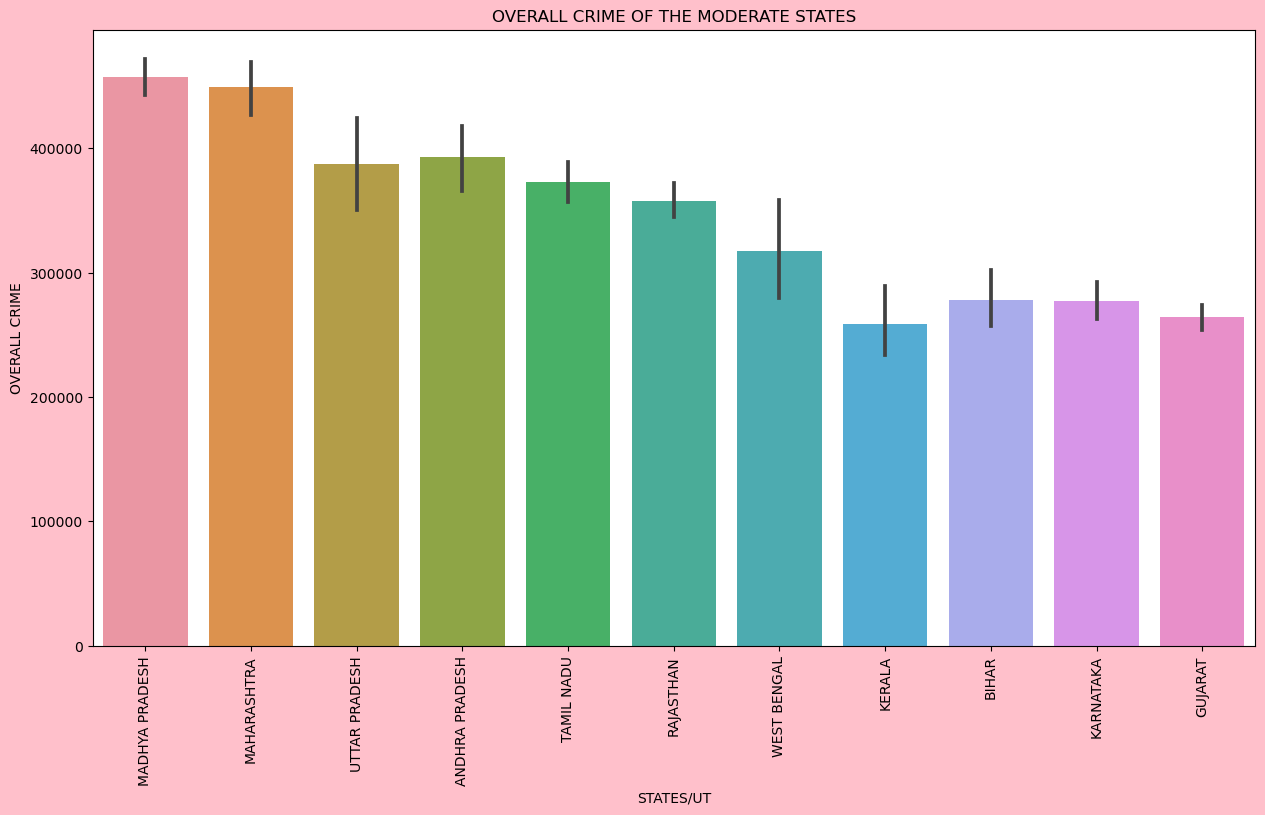

In [49]:
plt.figure(figsize=(15,8),facecolor='Pink')
sns.barplot(x=moderate_regions['STATE/UT'],y=moderate_regions['OVERALL CRIME'],)
plt.xticks(rotation=90)
plt.xlabel("STATES/UT")
plt.ylabel("OVERALL CRIME")
plt.title("OVERALL CRIME OF THE MODERATE STATES")
plt.show()

THIS SHOWS THE MODERATE AREAS OF OVERALL CRIME.

# What is impacting more crimes in sensitive areas

The reason for more crimes in the sensitive areas like Mumbai is mostly because of lack of strict laws and punishments to stop this hazardous act in society.The lack of education. 
The crime against women is considered as one of the most heinous kinds of crime in history.Many factors are contribute to the crime such as the mentality of the people, patriarchal society and so on.
Poverty drives crime and violence in numerous ways beyond a simple lack of income, through weakened social bonds. 

# What needs to be done to reduce crime.

Supporting people who have been victimized from being victimized again — through social supports has enormous potential for positive change.  
Crime does not result from “areas” of the “inner city” being high risk, but rather from a few very small, very bad places.
Concentrated efforts to improve contagious places can build resiliency across neighborhoods.

The relationship between jobs and crime is far more complex than in the popular imagination.
Integrating social and emotional skills training into employment training for young people has solid evidence of effectiveness as does employment planning for people returning from prison and transitional jobs for high rate
Local government can aid the development of these local assets by providing funding for hyper-local community .  
A number of important policies have been successfully piloted but not fully implemented by state and local government.

Too many financial burdens are imposed on people with low risk to public safety, creating a cycle of debt and incarceration, the latter which increases violence through stigma, criminal capital accumulation and a disruption of social bonds. Removing those conditions by clearing old warrants and convictions, reducing toxic fines and fees and ending poverty traps would prevent crime.
 
Improving education is its own crime-reducing category, but schools can facilitate crime reduction outside of schools. Reducing food insecurity, humanizing discipline and improving the safety of the school commute benefit everyone. 

There are any number of laws and regulations that could be tweaked to meaningfully reduce crime and victimization. For example, higher taxes that specifically target the overuse of criminogenic products like guns and alcohol have been shown to reduce excess demand. 


# Most safe and unsafe districts.
According to the analysis the union territories along with the small states in india are the most safe places.
Kerala, Andrah pradesh, Tamil Nadu and Rajasthan are the most unsafe places.
The unsafe district is Mumbai and most safe district is Ahmedadad.


# 4.4 Capstone project overall story in your own words. Min 1000 words

This dataset contains complete information about various aspects of crimes happened in India from 2001 to 2012. There are many factors that can be analysed from this dataset. Over all, I hope this dataset helps us to understand better about India.
Countries that are peaceful, orderly, and have a safe environment enable their communities to enjoy a sense of security about life and livelihood. 

This brief studies nine specific serious crimes: murder, kidnapping and abduction, crimes against women, crimes against children, property offences.
 
Data for the years between 2001 and 2012 reveals that while India’s population increased by 0.85 times, the volume of crime increased by 1.62 times and the crime rate by 0.77 times.
However, the years between the 2001-2012 periods show a sharp rise in the crime rate.
The NCRB collected data for murder, rape, kidnapping and abduction, dacoity, robbery, burglary, thefts, riots, criminal breach of trust, cheating, counterfeiting and others.
In addition to the traditional types of crimes, it also collected data on dowry deaths, assault on women, sexual harassment and among others.
Another potential cause for India’s increased crime rate is socioeconomic factors such as poverty, unemployment, and the rampant consumption of alcohol, drugs and unemployment.

The crime rates are much higher in larger cities than in smaller towns and villages, and that cities are more prone to crime.
According to the data, the cities of Jaipur, Indore, Kochi, Patna, Mumbai, Surat, Bengaluru, Kanpur, Ghaziabad, Nagpur, and Lucknow exceed the average crime rate of their states.
However, Kolkata, Chennai, Coimbatore, Pune, Hyderabad, and Kozhikode have lower crime rates than their state average. 
while the assertion that larger cities have a higher crime rate than smaller ones holds in India.
According to the 2012 report, Madhya Pradesh exceeds all other states studied in terms of the crime rate, followed by Karnataka, Harayana and Chhattisgarh have the next highest crime rates.
Ahemadabad (360.1) is the most peaceful city, with a low crime rate of 78.2. Additionally, Chennai (211.2), Coimbatore (211.2), Surat (215.3), Pune (219.3), Hyderabad (266.7), Bengaluru (337.3), Mumbai (367.3), Kozhikode (397.5), Kanpur (401.4), Ghaziabad (418.0), Nagpur (516), and Lucknow (521) have crime rates lower than the national city average.
The murder rate was highest in Utter Pradesh (5.2 per lakh population), followed by Bihar(4.5), Andaman and Nicobar.
The rate of kidnapping and abduction was highest in Utter Pradesh (34.2), followed by Rajasthan (32.4). Meghalaya (0.4), Goa (0.4), and Nagaland (0.9) had the lowest rates of kidnapping and abduction per lakh population. 
The 19 cities recorded higher kidnapping and abduction rates as a percentage of their population than the rest of the country (12.99 percent).
Crime rates against women were the highest in Madhaya Pradesh (239.3), West Bengal (186.9), and Assam (161.4). According to the report, gender crime increased by over 12.3 percent. Dadra and Nagar Haveli (12.9), Lakshadweep (17.1) and Daman and Diu (27.8) emerged as the most women-friendly cities. 
Utter Prasesh recorded the most crimes against children (7,400),
followed by Madhya Pradesh (3178) and Delhi (1578), while Dadra Nagar and Haveli (83), Lakshadweep (127) and Puducherry has the lowest crime against children. 

Crimes against women in India have been rising despite faster economic growth, higher education attainment, and increasing numbers of women in the economic sphere. This article explores the reasons for the incidence of reported crime in India.
We study five crime against women (rape, kidnapping, cruelty, dowry deaths, and molestation), across 35 states and union territories, 594 districts, over three decades (1991–2011). Our results confirm the importance of female literacy rates, female paid workforce participation, and female–male ratio in understanding crime. 
We find that these commonly-used socioeconomic variables have nonlinear effects on crime against women. These findings could have significant implications for the policies aiming to reduce crime against women.
 
For instance, some areas that require further study are the criminal behaviour of different sets of people, and migratory populations and whether they have a propensity towards particular crimes.
Additionally, the country must also consider ways to improve the quality of policing and reforming processes in the criminal justice system for the faster closure of cases. Finally, the NCRB must seek to improve data reliability by undertaking a nationwide crime victimisation survey that will lend greater authenticity to crime statistics collected nationwide.

